<a href="https://colab.research.google.com/github/01Joseph-Hwang10/AI_fundamentals/blob/main/aip2_assign6_20211381.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn as s
s.__version__

'0.22.2.post1'

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.6.0'

In [4]:
keras.__version__

'2.6.0'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
X_valid[1]

In [10]:
class_names = [
               "T-shirt/top",
               "Trouser",
               "Pullover",
               "Dress",
               "Coat",
               "Sandal",
               "Shirt",
               "Sneaker",
               "Bag",
               "Ankle boot",
]

In [11]:
y_train[0]

4

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers

In [16]:
hidden1 = model.layers[1]

In [17]:
hidden1.name

'dense'

In [18]:
model.get_layer('dense') is hidden1

True

In [19]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.06186877, -0.05772309, -0.0078777 , ...,  0.00811356,
        -0.0652101 ,  0.05490494],
       [-0.06173383, -0.03928837,  0.00525604, ...,  0.00425595,
        -0.06343409, -0.02041889],
       [ 0.02866194,  0.04565438, -0.05202717, ..., -0.07163519,
         0.03043108, -0.05789696],
       ...,
       [ 0.06310935,  0.04932345,  0.00187817, ...,  0.01342413,
        -0.05456889,  0.0265585 ],
       [-0.01606251,  0.05799618, -0.02999503, ...,  0.04025037,
         0.02354821,  0.00941396],
       [-0.07270631, -0.02461823,  0.0572719 , ..., -0.02285159,
         0.01688601,  0.05176304]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

In [23]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

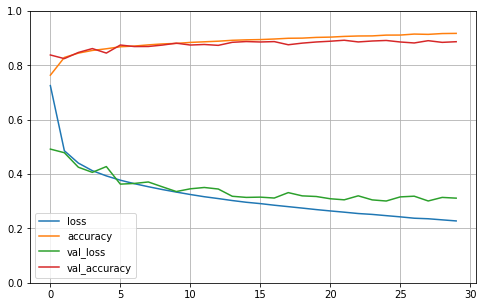

In [26]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 70.9942 - accuracy: 0.8364


[70.99418640136719, 0.8363999724388123]

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [31]:
# y_pred = model.predict_classes(X_new)
# y_pred

In [30]:
import numpy as np
y_pred = np.nonzero(y_proba)[1]
y_pred

array([9, 2, 1])

In [32]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [33]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [34]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

In [35]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [39]:
model = keras.models.Sequential(
    [
     keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
     keras.layers.Dense(1)
     ]
)
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.8516 - val_loss: 1.0106
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] 

In [41]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [42]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B] ,outputs=[output])

In [44]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
def absplit(x):
  return x[:, :5], x[:, 2:]
X_train_A, X_train_B = absplit(X_train)
X_valid_A, X_valid_B = absplit(X_valid)
X_test_A, X_test_B = absplit(X_test)
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.8499 - val_loss: 0.8666
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.8124 - val_loss: 0.7094
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7431 - val_loss: 0.6745
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6709 - val_loss: 0.6244
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6352 - val_loss: 0.6199
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6081 - val_loss: 0.5796
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5918 - val_loss: 0.5647
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5716 - val_loss: 0.5508
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5630 - val_loss: 0.5436
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5503 - val_loss: 0.5327

In [45]:
y_pred

array([[1.6268184],
       [1.6982621],
       [1.7623602]], dtype=float32)

In [46]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [48]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 0.8564 - main_output_loss: 0.7639 - aux_output_loss: 1.6893 - val_loss: 0.6461 - val_main_output_loss: 0.5854 - val_aux_output_loss: 1.1924
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 1.2170 - main_output_loss: 1.2285 - aux_output_loss: 1.1135 - val_loss: 1.0853 - val_main_output_loss: 1.0722 - val_aux_output_loss: 1.2033
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 4.7113 - main_output_loss: 5.0907 - aux_output_loss: 1.2968 - val_loss: 0.5138 - val_main_output_loss: 0.4438 - val_aux_output_loss: 1.1437
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4903 - main_output_loss: 0.4345 - aux_output_loss: 0.9928 - val_loss: 0.4796 - val_main_output_loss: 0.4307 - val_aux_output_loss: 0.9194
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4553 - main_output_loss: 0.4140 - aux_output_loss: 0.8270 - val_loss

In [49]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 3ms/step - loss: 0.3661 - main_output_loss: 0.3533 - aux_output_loss: 0.4810


In [50]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])